<h1>Global Health and Development (2012-2021)</h1>
<p>Baza danych zoostała pobrana z <a href>https://www.kaggle.com/datasets/martinagalasso/global-health-and-development-2012-2021?select=global_health.csv</a>  9.12.2024 </p>

<h2>Zaimpotrowanie Biliotek</h2>
<p>Bilioteka pycountry_convert odróżnia które państwa należą do danego kontynentu</p>
<p>Zainicjowanie pliku global_health.csv i przyjrzeniu się danym </p>

In [1]:
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt

file_path = 'global_health.csv'
data = pd.read_csv(file_path)


print(data) 


          Country Country_Code  Year  Fertility_Rate  \
0     Afghanistan          AFG  2012           5.830   
1     Afghanistan          AFG  2013           5.696   
2     Afghanistan          AFG  2014           5.560   
3     Afghanistan          AFG  2015           5.405   
4     Afghanistan          AFG  2016           5.262   
...           ...          ...   ...             ...   
1875     Zimbabwe          ZWE  2017           3.706   
1876     Zimbabwe          ZWE  2018           3.659   
1877     Zimbabwe          ZWE  2019           3.599   
1878     Zimbabwe          ZWE  2020           3.545   
1879     Zimbabwe          ZWE  2021           3.491   

      Urban_Population_Percent  Total_Population  Water_Access_Percent  \
0                       24.160        30466479.0             21.123996   
1                       24.373        31541209.0             22.034470   
2                       24.587        32716210.0             22.944301   
3                       24.803 

<p>Wypisanie wszystkich kolumn w liście </p>

In [2]:
data.columns.tolist()


['Country',
 'Country_Code',
 'Year',
 'Fertility_Rate',
 'Urban_Population_Percent',
 'Total_Population',
 'Water_Access_Percent',
 'Unemployment_Rate',
 'Sanitary_Expense_Per_GDP',
 'Life_Expectancy',
 'Life_Expectancy_Female',
 'Life_Expectancy_Male',
 'Infant_Deaths',
 'GDP_Per_Capita',
 'Hospital_Beds_Per_1000',
 'Female_Population',
 'Male_Population',
 'Alcohol_Consumption_Per_Capita',
 'Immunization_Rate',
 'Sanitary_Expense_Per_Capita',
 'CO2_Exposure_Percent',
 'Air_Pollution',
 'Labour_Force_Total',
 'Tuberculosis_Per_100000',
 'Suicide_Rate_Percent',
 'Obesity_Rate_Percent',
 'Underweight_Rate_Percent',
 'Overweight_Rate_Percent',
 'Safe_Water_Access_Percent']

<p>Wypisanie państw by zobaczyć jakie mają nazwy</p>

In [3]:
unique_countries = data['Country'].unique()

unique_countries_count = len(unique_countries)

unique_countries_count, unique_countries

(188,
 array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
        'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
        'Grenada', 'G

<h2>Przyporządkowanie kodu kontynentu do państwa</h2>

In [4]:


def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except KeyError:
        return "Unknown" 


data['Continent_Code'] = data['Country'].apply(get_continent)

data[['Country', 'Continent_Code']].head()


Country Continent_Code
0  Afghanistan             AS
1  Afghanistan             AS
2  Afghanistan             AS
3  Afghanistan             AS
4  Afghanistan             AS

<h2>Przyjżenie się czy nie brakuje danych</h2>

In [13]:
data.count()

Country                           1880
Country_Code                      1880
Year                              1880
Fertility_Rate                    1844
Urban_Population_Percent          1880
Total_Population                  1880
Water_Access_Percent              1225
Unemployment_Rate                 1740
Sanitary_Expense_Per_GDP          1834
Life_Expectancy                   1840
Life_Expectancy_Female            1840
Life_Expectancy_Male              1840
Infant_Deaths                     1870
GDP_Per_Capita                    1853
Hospital_Beds_Per_1000            1281
Female_Population                 1880
Male_Population                   1880
Alcohol_Consumption_Per_Capita    1624
Immunization_Rate                 1870
Sanitary_Expense_Per_Capita       1833
CO2_Exposure_Percent              1683
Air_Pollution                     1683
Labour_Force_Total                1740
Tuberculosis_Per_100000           1670
Suicide_Rate_Percent              1272
Obesity_Rate_Percent     

<p>Z sumowanie ile jest pustych wartości w kolumnach</p>

In [15]:
data.isnull().sum()

Country                             0
Country_Code                        0
Year                                0
Fertility_Rate                     36
Urban_Population_Percent            0
Total_Population                    0
Water_Access_Percent              655
Unemployment_Rate                 140
Sanitary_Expense_Per_GDP           46
Life_Expectancy                    40
Life_Expectancy_Female             40
Life_Expectancy_Male               40
Infant_Deaths                      10
GDP_Per_Capita                     27
Hospital_Beds_Per_1000            599
Female_Population                   0
Male_Population                     0
Alcohol_Consumption_Per_Capita    256
Immunization_Rate                  10
Sanitary_Expense_Per_Capita        47
CO2_Exposure_Percent              197
Air_Pollution                     197
Labour_Force_Total                140
Tuberculosis_Per_100000           210
Suicide_Rate_Percent              608
Obesity_Rate_Percent              230
Underweight_

<p>Lista brakujących danych w kolumnie "Water_Access_Percent"</p>

In [17]:
data[data['Water_Access_Percent'].isnull()]

Country Country_Code  Year  Fertility_Rate  Urban_Population_Percent  \
40    Angola          AGO  2012           6.039                    61.268   
41    Angola          AGO  2013           5.953                    62.002   
42    Angola          AGO  2014           5.864                    62.731   
43    Angola          AGO  2015           5.774                    63.446   
44    Angola          AGO  2016           5.686                    64.149   
...      ...          ...   ...             ...                       ...   
1865  Zambia          ZMB  2017           4.614                    42.976   
1866  Zambia          ZMB  2018           4.536                    43.521   
1867  Zambia          ZMB  2019           4.451                    44.072   
1868  Zambia          ZMB  2020           4.379                    44.629   
1869  Zambia          ZMB  2021           4.308                    45.192   

      Total_Population  Water_Access_Percent  Unemployment_Rate  \
40          25188292.0                   NaN             16.557   
41          26147002.0                   NaN             16.487   
42          27128337.0                   NaN             16.401   
43          28127721.0                   NaN             16.491   
44          29154746.0                   NaN             16.580   
...                ...                   ...                ...   
1865        17298054.0                   NaN              8.518   
1866        17835893.0                   NaN              5.031   
1867        18380477.0                   NaN              5.539   
1868        18927715.0                   NaN              6.032   
1869        19473125.0                   NaN              5.195   

      Sanitary_Expense_Per_GDP  Life_Expectancy  ...  CO2_Exposure_Percent  \
40                    2.395750           58.623  ...             24.480493   
41                    2.732827           59.307  ...             24.538658   
42                    2.434129           60.040  ...             23.945584   
43                    2.605795           60.655  ...             25.002150   
44                    2.713150           61.092  ...             25.180701   
...                        ...              ...  ...                   ...   
1865                  4.781562           62.120  ...             23.758282   
1866                  4.769967           62.342  ...             23.336720   
1867                  6.753325           62.793  ...             23.203748   
1868                  6.316198           62.380  ...             24.308592   
1869                  6.624165           61.223  ...                   NaN   

      Air_Pollution  Labour_Force_Total  Tuberculosis_Per_100000  \
40        24.480493          10527326.0                    380.0   
41        24.538658          10886364.0                    376.0   
42        23.945584          11251540.0                    370.0   
43        25.002150          11623549.0                    366.0   
44        25.180701          12011479.0                    362.0   
...             ...                 ...                      ...   
1865      23.758282           5594492.0                    361.0   
1866      23.336720           5789287.0                    346.0   
1867      23.203748           6117559.0                    333.0   
1868      24.308592           6488754.0                    319.0   
1869            NaN           6642413.0                    307.0   

      Suicide_Rate_Percent  Obesity_Rate_Percent  Underweight_Rate_Percent  \
40                   11.23                 11.36                     10.12   
41                   11.31                 11.70                      9.97   
42                   10.44                 12.06                     11.00   
43                   10.46                 12.44                     10.82   
44                    9.96                 12.82                     10.65   
...                    ...                   ...     

<p>Sprawdzenie ile zostanie danych po wykluczeniu wierszy z pustymi wartościami</p>

In [19]:
data_noNA=data.dropna().copy()

In [21]:
data_noNA.count()

Country                           669
Country_Code                      669
Year                              669
Fertility_Rate                    669
Urban_Population_Percent          669
Total_Population                  669
Water_Access_Percent              669
Unemployment_Rate                 669
Sanitary_Expense_Per_GDP          669
Life_Expectancy                   669
Life_Expectancy_Female            669
Life_Expectancy_Male              669
Infant_Deaths                     669
GDP_Per_Capita                    669
Hospital_Beds_Per_1000            669
Female_Population                 669
Male_Population                   669
Alcohol_Consumption_Per_Capita    669
Immunization_Rate                 669
Sanitary_Expense_Per_Capita       669
CO2_Exposure_Percent              669
Air_Pollution                     669
Labour_Force_Total                669
Tuberculosis_Per_100000           669
Suicide_Rate_Percent              669
Obesity_Rate_Percent              669
Underweight_

<p>Po wykluczeniu wierszy z pustymi wartościami baza zostaje okrojona do około 1/3 swej wielkości</p>

<h2>Sprawdzenie przypisanie kodu kontynentu do państw</h2>

In [28]:

continent_counts = data['Continent_Code'].value_counts()


continent_counts


Continent_Code
AF         480
EU         430
AS         400
NA         190
Unknown    140
OC         130
SA         110
Name: count, dtype: int64

<p>Wyświetlenie których państw biblioteka nie rozpoznała</p>

In [30]:

unknown_countries = data[data['Continent_Code'] == 'Unknown']['Country'].unique()

unknown_countries

array(['Bahamas, The', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Egypt, Arab Rep.', 'Gambia, The', 'Iran, Islamic Rep.',
       'Korea, Rep.', 'Lao PDR', 'Micronesia, Fed. Sts.', 'Timor-Leste',
       'Turkiye', 'Venezuela, RB', 'Yemen, Rep.'], dtype=object)

<p>Stworzenie listy i ręczne przypisanie państw do kontynentów</p>

In [34]:

manual_continent_mapping = {
    'Bahamas, The': 'NA',
    'Congo, Dem. Rep.': 'AF',
    'Congo, Rep.': 'AF',
    "Cote d'Ivoire": 'AF',
    'Egypt, Arab Rep.': 'AF',
    'Gambia, The': 'AF',
    'Iran, Islamic Rep.': 'AS',
    'Korea, Rep.': 'AS',
    'Lao PDR': 'AS',
    'Micronesia, Fed. Sts.': 'OC',
    'Timor-Leste': 'OC',
    'Turkiye': 'AS',
    'Venezuela, RB': 'SA',
    'Yemen, Rep.': 'AS'
}


data['Continent_Code'] = data['Country'].apply(
    lambda x: manual_continent_mapping[x] if x in manual_continent_mapping else data.loc[data['Country'] == x, 'Continent_Code'].iloc[0]
)


data[data['Country'].isin(manual_continent_mapping.keys())][['Country', 'Continent_Code']]



Country Continent_Code
110   Bahamas, The             NA
111   Bahamas, The             NA
112   Bahamas, The             NA
113   Bahamas, The             NA
114   Bahamas, The             NA
...            ...            ...
1855   Yemen, Rep.             AS
1856   Yemen, Rep.             AS
1857   Yemen, Rep.             AS
1858   Yemen, Rep.             AS
1859   Yemen, Rep.             AS

[140 rows x 2 columns]

<p>Ponowne sprawdzenie czy wszytkie państwa mają przypisany kod kontynentu</p>

In [36]:
continent_counts = data['Continent_Code'].value_counts()


continent_counts

Continent_Code
AF    530
AS    450
EU    430
NA    200
OC    150
SA    120
Name: count, dtype: int64

<h2>Operacja na danych</h2>
<p>Wyświetlenie przewidywanych życia ogólne, kobiet i mężczyzn w latach 2012-2021 dla każdego kontynentu</p>

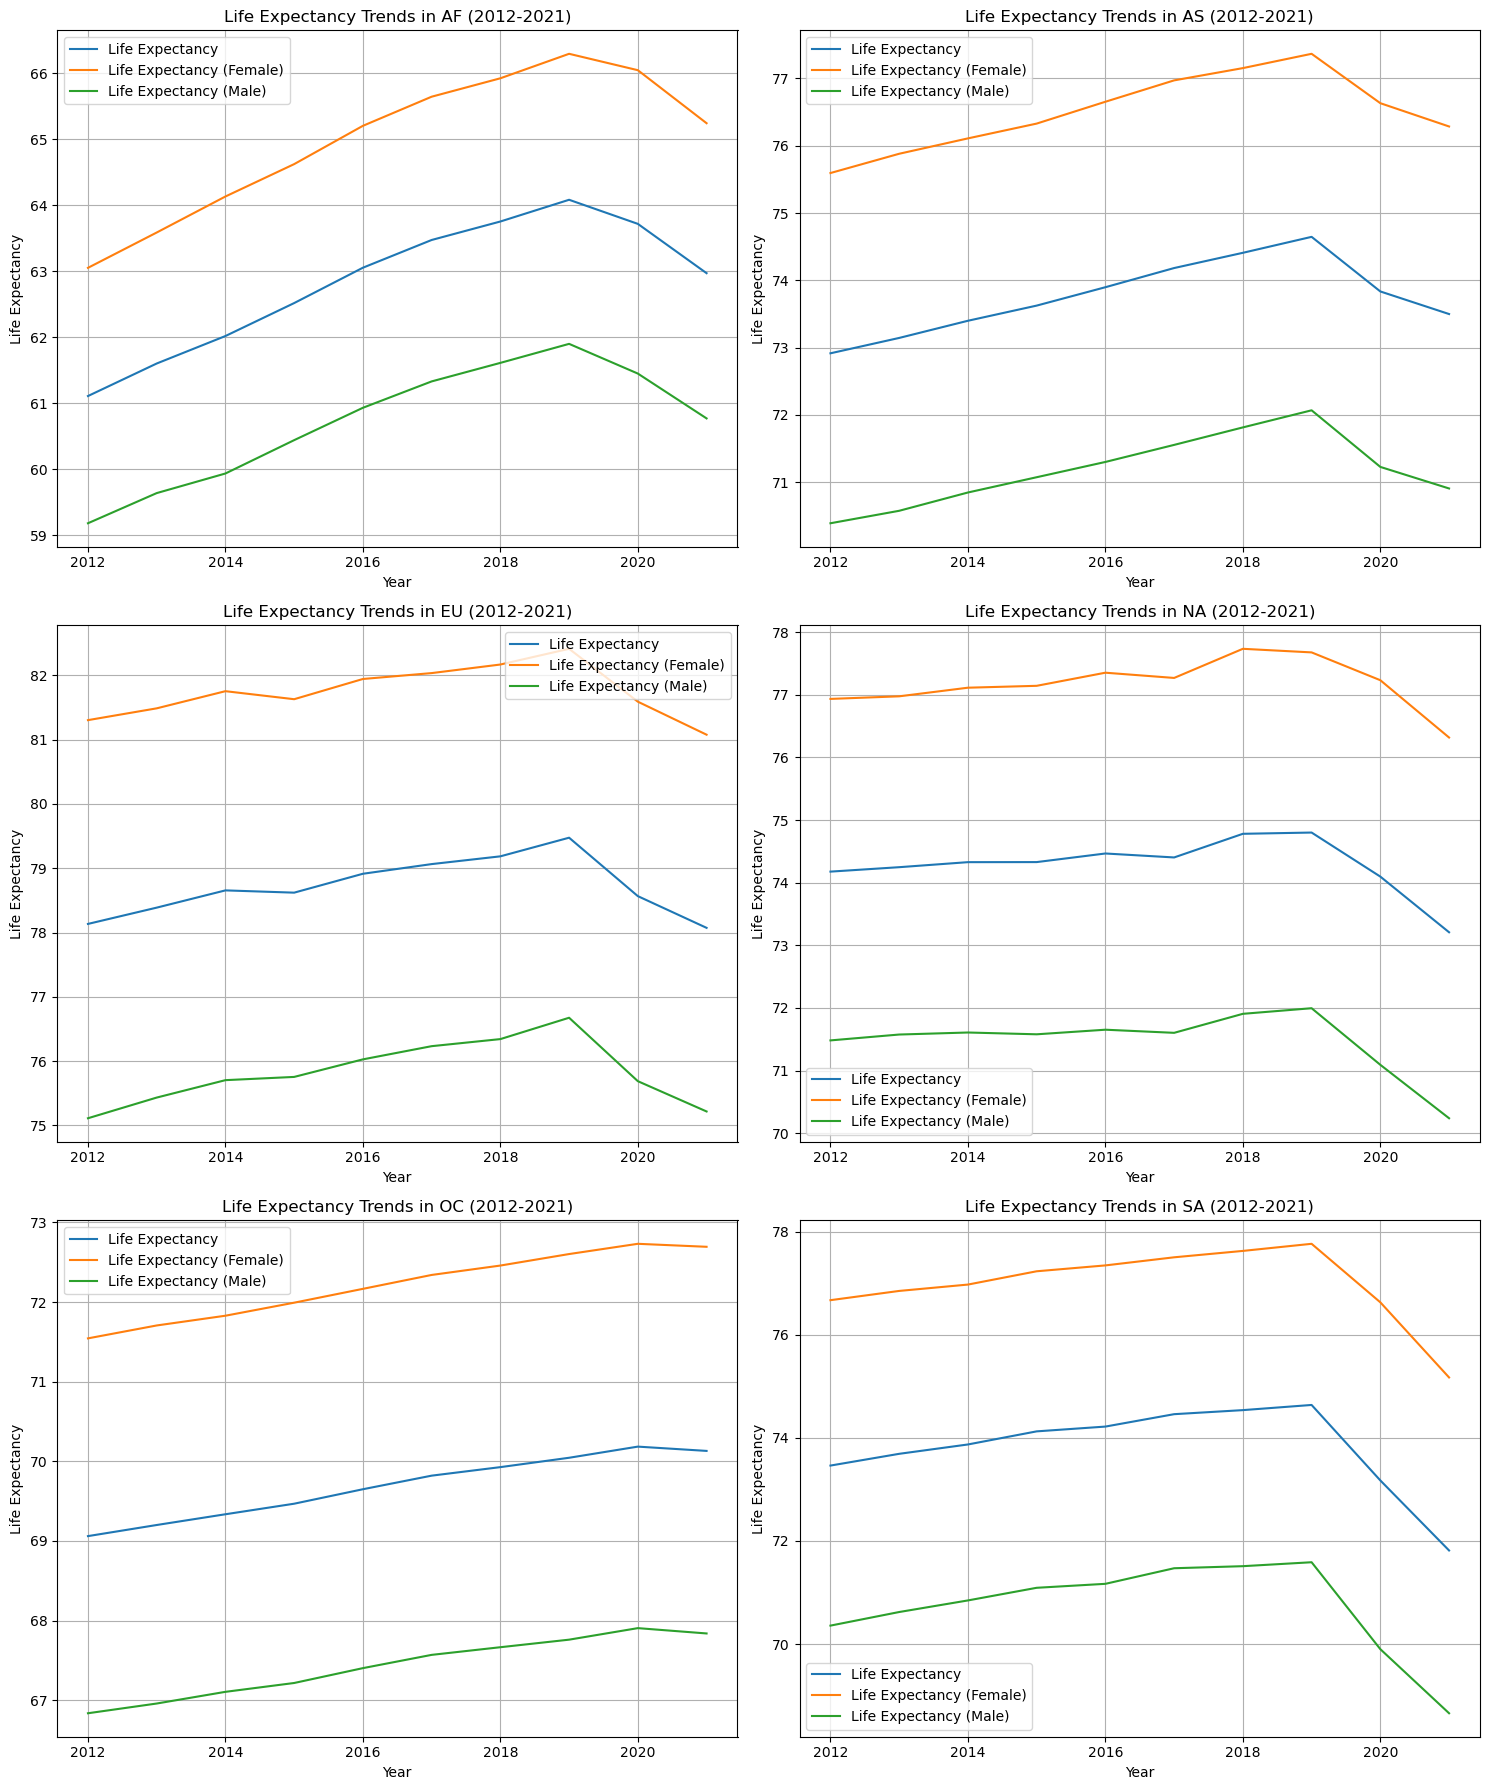

In [39]:

filtered_data = data[(data['Year'] >= 2012) & (data['Year'] <= 2021)]


grouped_data = filtered_data.groupby(['Continent_Code', 'Year'])[
    ['Life_Expectancy', 'Life_Expectancy_Female', 'Life_Expectancy_Male']
].mean().reset_index()


continents = [c for c in grouped_data['Continent_Code'].unique() if c != "Unknown"]


fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, continent in enumerate(continents[:6]): 
    continent_data = grouped_data[grouped_data['Continent_Code'] == continent]
    axes[i].plot(continent_data['Year'], continent_data['Life_Expectancy'], label='Life Expectancy')
    axes[i].plot(continent_data['Year'], continent_data['Life_Expectancy_Female'], label='Life Expectancy (Female)')
    axes[i].plot(continent_data['Year'], continent_data['Life_Expectancy_Male'], label='Life Expectancy (Male)')
    axes[i].set_title(f'Life Expectancy Trends in {continent} (2012-2021)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Life Expectancy')
    axes[i].legend()
    axes[i].grid(True)


for j in range(len(continents), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<p>Wyświetlenie liczby ludności Polski i jej sąsiadów w latach 2012-2021 również z podziałem na liczbę kobiet i mężczyzn</p>

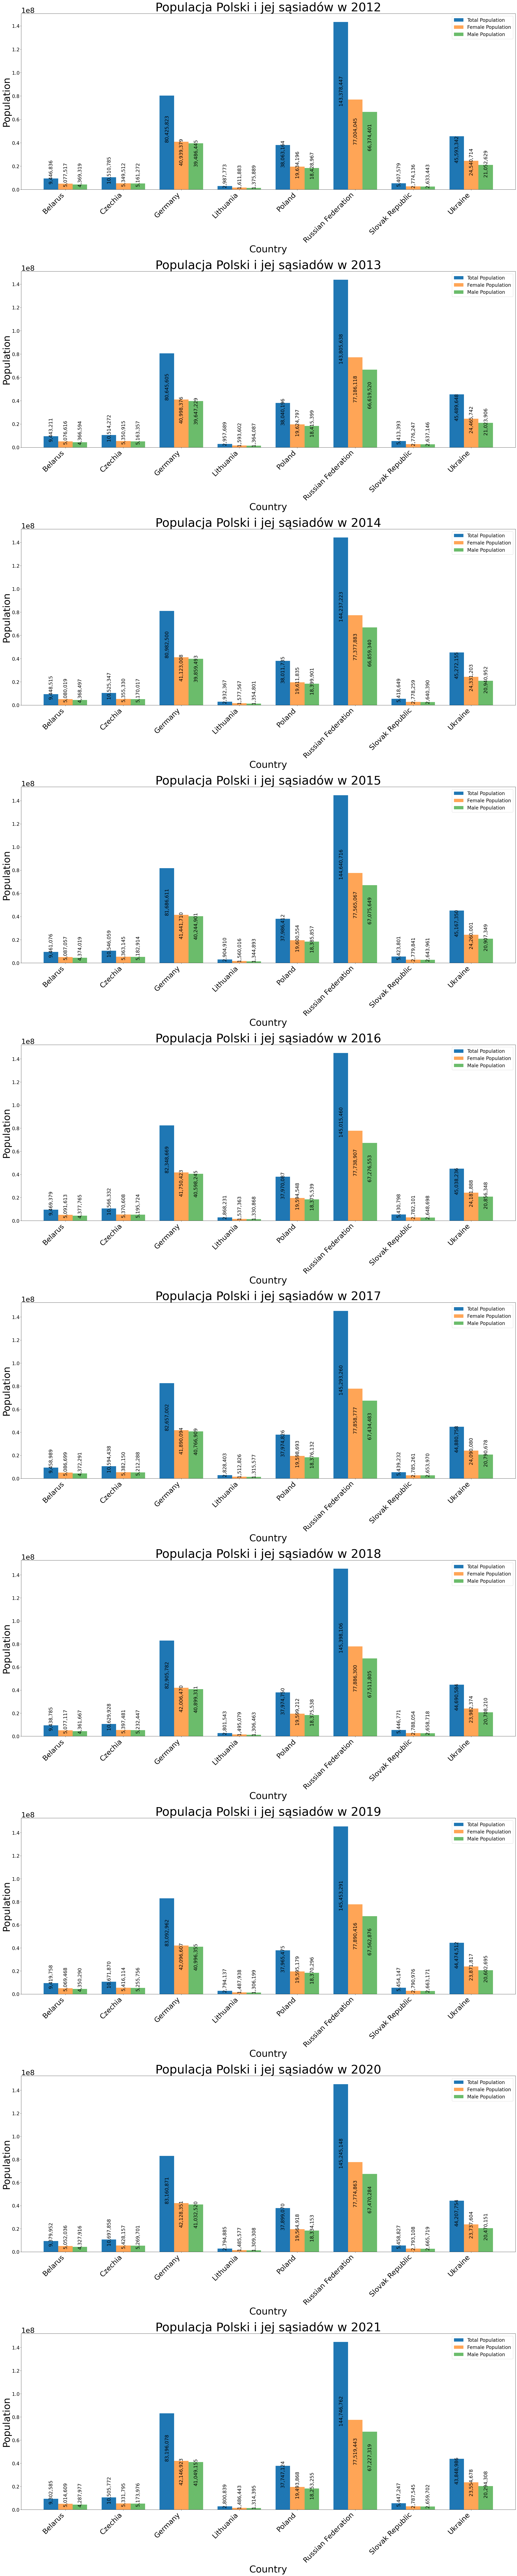

In [122]:

poland_and_neighbors = [
    'Poland', 'Germany', 'Czechia', 'Slovak Republic',
    'Ukraine', 'Belarus', 'Lithuania', 'Russian Federation'
]

# Filtrowanie danych dla Polski i jej sąsiadów oraz lat 2012-2021
filtered_data = data[
    (data['Country'].isin(poland_and_neighbors)) &
    (data['Year'] >= 2012) & (data['Year'] <= 2021)
]

fig, axes = plt.subplots(10, 1, figsize=(30, 150), constrained_layout=True)
axes = axes.flatten()

years = range(2012, 2022)

for i, year in enumerate(years):
    ax = axes[i]
    year_data = filtered_data[filtered_data['Year'] == year]
    x = year_data['Country']

    
    bar_width = 0.25
    x_positions = range(len(x))

    bars_total = ax.bar(
        [p - bar_width for p in x_positions],
        year_data['Total_Population'], 
        width=bar_width, 
        label='Total Population'
    )
    bars_female = ax.bar(
        x_positions, 
        year_data['Female_Population'], 
        width=bar_width, 
        label='Female Population', 
        alpha=0.7
    )
    bars_male = ax.bar(
        [p + bar_width for p in x_positions], 
        year_data['Male_Population'], 
        width=bar_width, 
        label='Male Population', 
        alpha=0.7
    )

    
    for bar in bars_total + bars_female + bars_male:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0, 
            height/2, 
            f'{int(height):,}', 
            ha='center', 
            va='bottom', 
            fontsize=20, 
            rotation=90 
        )

   
    ax.set_title(f'Populacja Polski i jej sąsiadów w {year}', fontsize=50)
    ax.set_xlabel('Country', fontsize=40)
    ax.set_ylabel('Population', fontsize=40)
 
    ax.set_xticks(range(len(x)))  
    ax.set_xticklabels(x, rotation=45, ha='right', fontsize=30) 

    ax.legend(fontsize=20)
    ax.tick_params(axis='y', labelsize=20)  
    ax.yaxis.get_offset_text().set_fontsize(30)


for i in range(len(years), len(axes)):
    fig.delaxes(axes[i])

plt.show()


<p>Pokazanie Top 10 w liczbie ludności na świecie na przestrzeni lat 2012-2021</p>

In [134]:
# Filtrowanie danych dla lat 2012-2021
filtered_data = data[(data['Year'] >= 2012) & (data['Year'] <= 2021)]

# Grupowanie danych, aby znaleźć Top 10 dla każdego roku
top_10_each_year = (
    filtered_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)
# Podział danych top_10_each_year na poszczególne lata
years = filtered_data['Year'].unique()
top_10_each_year_dict = {
    year: top_10_each_year[top_10_each_year['Year'] == year] for year in years
}
top_10_each_year_dict


C:\Users\valen\AppData\Local\Temp\ipykernel_6320\2792410456.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year             Country  Total_Population
 350   2012               China      1.354190e+09
 760   2012               India      1.274487e+09
 1790  2012       United States      3.138777e+08
 770   2012           Indonesia      2.502227e+08
 1300  2012            Pakistan      2.022059e+08
 230   2012              Brazil      1.999777e+08
 1260  2012             Nigeria      1.700759e+08
 130   2012          Bangladesh      1.520906e+08
 1410  2012  Russian Federation      1.433784e+08
 840   2012               Japan      1.276290e+08,
 2013:       Year             Country  Total_Population
 351   2013               China      1.363240e+09
 761   2013               India      1.291132e+09
 1791  2013       United States      3.160599e+08
 771   2013           Indonesia      2.532759e+08
 1301  2013            Pakistan      2.053376e+08
 231   2013              Brazil      2.017218e+08
 1261  2013             Nigeria      1.747261e+08
 131   2013          Bangladesh      

<p>Top 10 Liczby ludności dla Afryki</p>

In [144]:

africa_data = data[(data['Continent_Code'] == 'AF') & (data['Year'] >= 2012) & (data['Year'] <= 2021)]

top_10_africa_each_year = (
    africa_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)

years_africa = filtered_data['Year'].unique()
top_10_africa_each_year_dict = {
    year: top_10_africa_each_year[top_10_africa_each_year['Year'] == year] for year in years
}
top_10_africa_each_year_dict

C:\Users\valen\AppData\Local\Temp\ipykernel_6320\2975718093.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year           Country  Total_Population
 1260  2012           Nigeria       170075932.0
 570   2012          Ethiopia        94451280.0
 510   2012  Egypt, Arab Rep.        91240376.0
 380   2012  Congo, Dem. Rep.        70997870.0
 1550  2012      South Africa        53145033.0
 1650  2012          Tanzania        47786137.0
 870   2012             Kenya        43725806.0
 20    2012           Algeria        37260563.0
 1590  2012             Sudan        35159792.0
 1750  2012            Uganda        34273295.0,
 2013:       Year           Country  Total_Population
 1261  2013           Nigeria       174726123.0
 571   2013          Ethiopia        97084366.0
 511   2013  Egypt, Arab Rep.        93377890.0
 381   2013  Congo, Dem. Rep.        73460021.0
 1551  2013      South Africa        53873616.0
 1651  2013          Tanzania        49253643.0
 871   2013             Kenya        44792368.0
 21    2013           Algeria        38000626.0
 1591  2013             Sud

<p>Top 10 Liczby ludności dla Azji</p>

In [148]:

asia_data = data[(data['Continent_Code'] == 'AS') & (data['Year'] >= 2012) & (data['Year'] <= 2021)]

top_10_asia_each_year = (
    asia_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)
years_asia = filtered_data['Year'].unique()
top_10_asia_each_year_dict = {
    year: top_10_asia_each_year[top_10_asia_each_year['Year'] == year] for year in years
}
top_10_asia_each_year_dict

C:\Users\valen\AppData\Local\Temp\ipykernel_6320\1338248896.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year             Country  Total_Population
 350   2012               China      1.354190e+09
 760   2012               India      1.274487e+09
 770   2012           Indonesia      2.502227e+08
 1300  2012            Pakistan      2.022059e+08
 130   2012          Bangladesh      1.520906e+08
 840   2012               Japan      1.276290e+08
 1360  2012         Philippines      9.803232e+07
 1840  2012            Viet Nam      8.930133e+07
 780   2012  Iran, Islamic Rep.      7.732445e+07
 1720  2012             Turkiye      7.517583e+07,
 2013:       Year             Country  Total_Population
 351   2013               China      1.363240e+09
 761   2013               India      1.291132e+09
 771   2013           Indonesia      2.532759e+08
 1301  2013            Pakistan      2.053376e+08
 131   2013          Bangladesh      1.540301e+08
 841   2013               Japan      1.274450e+08
 1361  2013         Philippines      9.970011e+07
 1841  2013            Viet Nam      

<p>Top 10 Liczby ludności dla Europy</p>

In [150]:

europe_data = data[(data['Continent_Code'] == 'EU') & (data['Year'] >= 2012) & (data['Year'] <= 2021)]

top_10_europe_each_year = (
    europe_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)

years_europe = filtered_data['Year'].unique()
top_10_europe_each_year_dict = {
    year: top_10_europe_each_year[top_10_europe_each_year['Year'] == year] for year in years
}
top_10_europe_each_year_dict

C:\Users\valen\AppData\Local\Temp\ipykernel_6320\318427.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year             Country  Total_Population
 1410  2012  Russian Federation       143378447.0
 640   2012             Germany        80425823.0
 600   2012              France        65662240.0
 1780  2012      United Kingdom        63700215.0
 820   2012               Italy        59539717.0
 1570  2012               Spain        46773055.0
 1760  2012             Ukraine        45593342.0
 1370  2012              Poland        38063164.0
 1400  2012             Romania        20058035.0
 1220  2012         Netherlands        16754962.0,
 2013:       Year             Country  Total_Population
 1411  2013  Russian Federation       143805638.0
 641   2013             Germany        80645605.0
 601   2013              France        66002289.0
 1781  2013      United Kingdom        64128273.0
 821   2013               Italy        60233948.0
 1571  2013               Spain        46620045.0
 1761  2013             Ukraine        45489648.0
 1371  2013              Poland      

<p>Top 10 Liczby ludności dla Ameryki Północnej</p>

In [160]:

NAmerica_data = data[(data['Continent_Code'] == 'NA') & (data['Year'] >= 2012) & (data['Year'] <= 2021)]


top_10_NAmerica_each_year = (
    NAmerica_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)

years_NAmerica = filtered_data['Year'].unique()
top_10_NAmerica_each_year_dict = {
    year: top_10_NAmerica_each_year[top_10_NAmerica_each_year['Year'] == year] for year in years
}
top_10_NAmerica_each_year_dict

C:\Users\valen\AppData\Local\Temp\ipykernel_6320\1161269664.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year             Country  Total_Population
 1790  2012       United States       313877662.0
 1100  2012              Mexico       115755909.0
 310   2012              Canada        34713395.0
 680   2012           Guatemala        14781942.0
 430   2012                Cuba        11309290.0
 720   2012               Haiti        10108539.0
 490   2012  Dominican Republic        10030882.0
 730   2012            Honduras         8792367.0
 520   2012         El Salvador         6161289.0
 1240  2012           Nicaragua         6030607.0,
 2013:       Year             Country  Total_Population
 1791  2013       United States       316059947.0
 1101  2013              Mexico       117290686.0
 311   2013              Canada        35080992.0
 681   2013           Guatemala        15043981.0
 431   2013                Cuba        11321579.0
 721   2013               Haiti        10261206.0
 491   2013  Dominican Republic        10157051.0
 731   2013            Honduras      

<p>Top 10 Liczby ludności dla Oceanii</p>

In [162]:

oceania_data = data[(data['Continent_Code'] == 'OC') & (data['Year'] >= 2012) & (data['Year'] <= 2021)]

top_10_oceania_each_year = (
    oceania_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)

years_oceania = filtered_data['Year'].unique()
top_10_oceania_each_year_dict = {
    year: top_10_oceania_each_year[top_10_oceania_each_year['Year'] == year] for year in years
}
top_10_oceania_each_year_dict

C:\Users\valen\AppData\Local\Temp\ipykernel_6320\1565466495.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year                Country  Total_Population
 80    2012              Australia        22733465.0
 1330  2012       Papua New Guinea         8026545.0
 1230  2012            New Zealand         4408100.0
 1670  2012            Timor-Leste         1137676.0
 580   2012                   Fiji          911059.0
 1540  2012        Solomon Islands          567763.0
 1820  2012                Vanuatu          257313.0
 1430  2012                  Samoa          198124.0
 880   2012               Kiribati          111618.0
 1110  2012  Micronesia, Fed. Sts.          108232.0,
 2013:       Year                Country  Total_Population
 81    2013              Australia        23128129.0
 1331  2013       Papua New Guinea         8245627.0
 1231  2013            New Zealand         4442100.0
 1671  2013            Timor-Leste         1161555.0
 581   2013                   Fiji          913453.0
 1541  2013        Solomon Islands          582365.0
 1821  2013                Vanuat

<p>Top 10 Liczby ludności dla Ameryki Południowej</p>

In [166]:

SAmerica_data = data[(data['Continent_Code'] == 'SA') & (data['Year'] >= 2012) & (data['Year'] <= 2021)]


top_10_SAmerica_each_year = (
    SAmerica_data.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])
)

years_SAmerica = filtered_data['Year'].unique()
top_10_SAmerica_each_year_dict = {
    year: top_10_SAmerica_each_year[top_10_SAmerica_each_year['Year'] == year] for year in years
}
top_10_SAmerica_each_year_dict

C:\Users\valen\AppData\Local\Temp\ipykernel_6320\3321158501.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Total_Population')[['Year', 'Country', 'Total_Population']])


{2012:       Year        Country  Total_Population
 230   2012         Brazil       199977707.0
 360   2012       Colombia        45782417.0
 60    2012      Argentina        41733271.0
 1350  2012           Peru        29749589.0
 1830  2012  Venezuela, RB        29470426.0
 340   2012          Chile        17341771.0
 500   2012        Ecuador        15483883.0
 200   2012        Bolivia        10569697.0
 1340  2012       Paraguay         5923322.0
 1800  2012        Uruguay         3371133.0,
 2013:       Year        Country  Total_Population
 231   2013         Brazil       201721767.0
 361   2013       Colombia        46237930.0
 61    2013      Argentina        42202935.0
 1351  2013           Peru        30038809.0
 1831  2013  Venezuela, RB        29838021.0
 341   2013          Chile        17509925.0
 501   2013        Ecuador        15722989.0
 201   2013        Bolivia        10743349.0
 1341  2013       Paraguay         6005652.0
 1801  2013        Uruguay         3381180

<p>Wydatki sanitarne na PKB %</p>

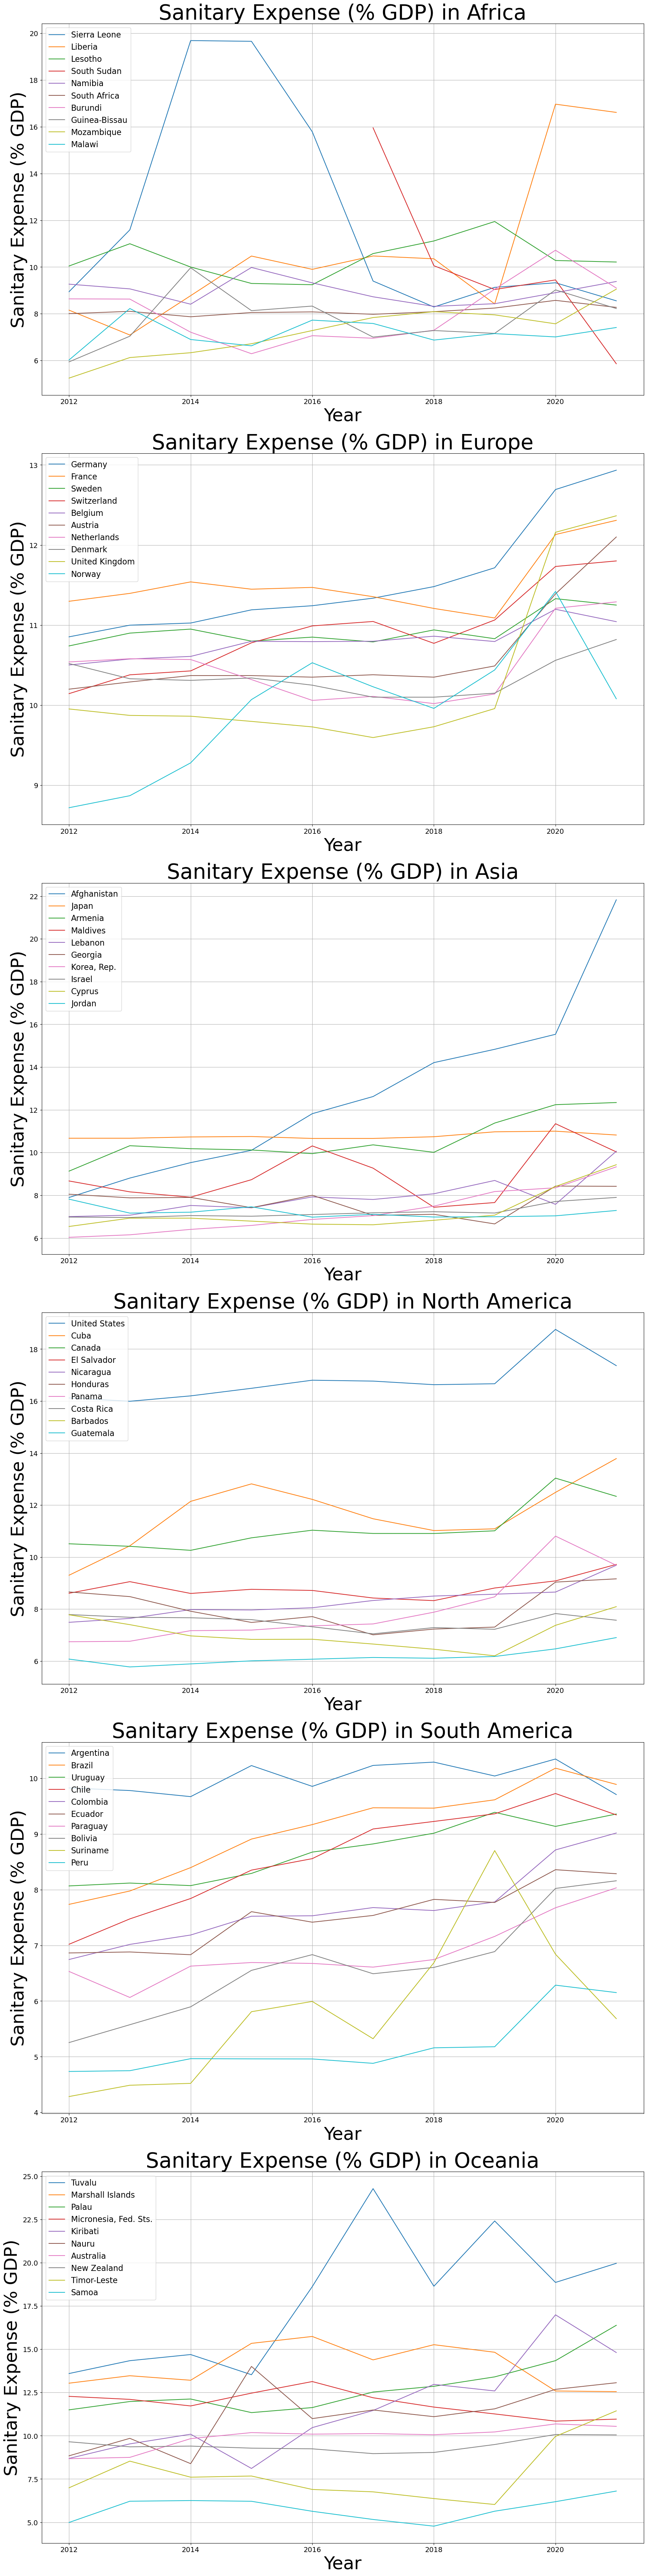

In [193]:

continents = {
    'AF': 'Africa',
    'EU': 'Europe',
    'AS': 'Asia',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania'
}


fig, axes = plt.subplots(6, 1, figsize=(18, 72), constrained_layout=True)
axes = axes.flatten()

for idx, (continent_code, continent_name) in enumerate(continents.items()):
    
    continent_data = data[data['Continent_Code'] == continent_code]
    
    
    avg_sanitary_expense = (
        continent_data.groupby('Country')['Sanitary_Expense_Per_GDP'].mean().reset_index()
    )
    
    
    top_10_countries = avg_sanitary_expense.sort_values(
        by='Sanitary_Expense_Per_GDP', ascending=False
    ).head(10)
    
    
    top_countries_data = data[
        (data['Country'].isin(top_10_countries['Country'])) &
        (data['Continent_Code'] == continent_code)
    ]
    
    
    ax = axes[idx]
    for country in top_10_countries['Country']:
        country_data = top_countries_data[top_countries_data['Country'] == country]
        ax.plot(
            country_data['Year'], 
            country_data['Sanitary_Expense_Per_GDP'], 
            label=country
        )
    
   
    ax.set_title(f'Sanitary Expense (% GDP) in {continent_name}', fontsize=42)
    ax.set_xlabel('Year', fontsize=36)
    ax.set_ylabel('Sanitary Expense (% GDP)', fontsize=36)
   
    ax.tick_params(axis='x', labelsize=14)  
    ax.tick_params(axis='y', labelsize=14)  

    ax.legend(fontsize=16, loc='upper left')
    ax.grid(True)


for idx in range(len(continents), len(axes)):
    fig.delaxes(axes[idx])

plt.show()

<p>Ile przypada łóżek szpitalnych na 1000 osób w top 10 państwach na kontynentach</p>

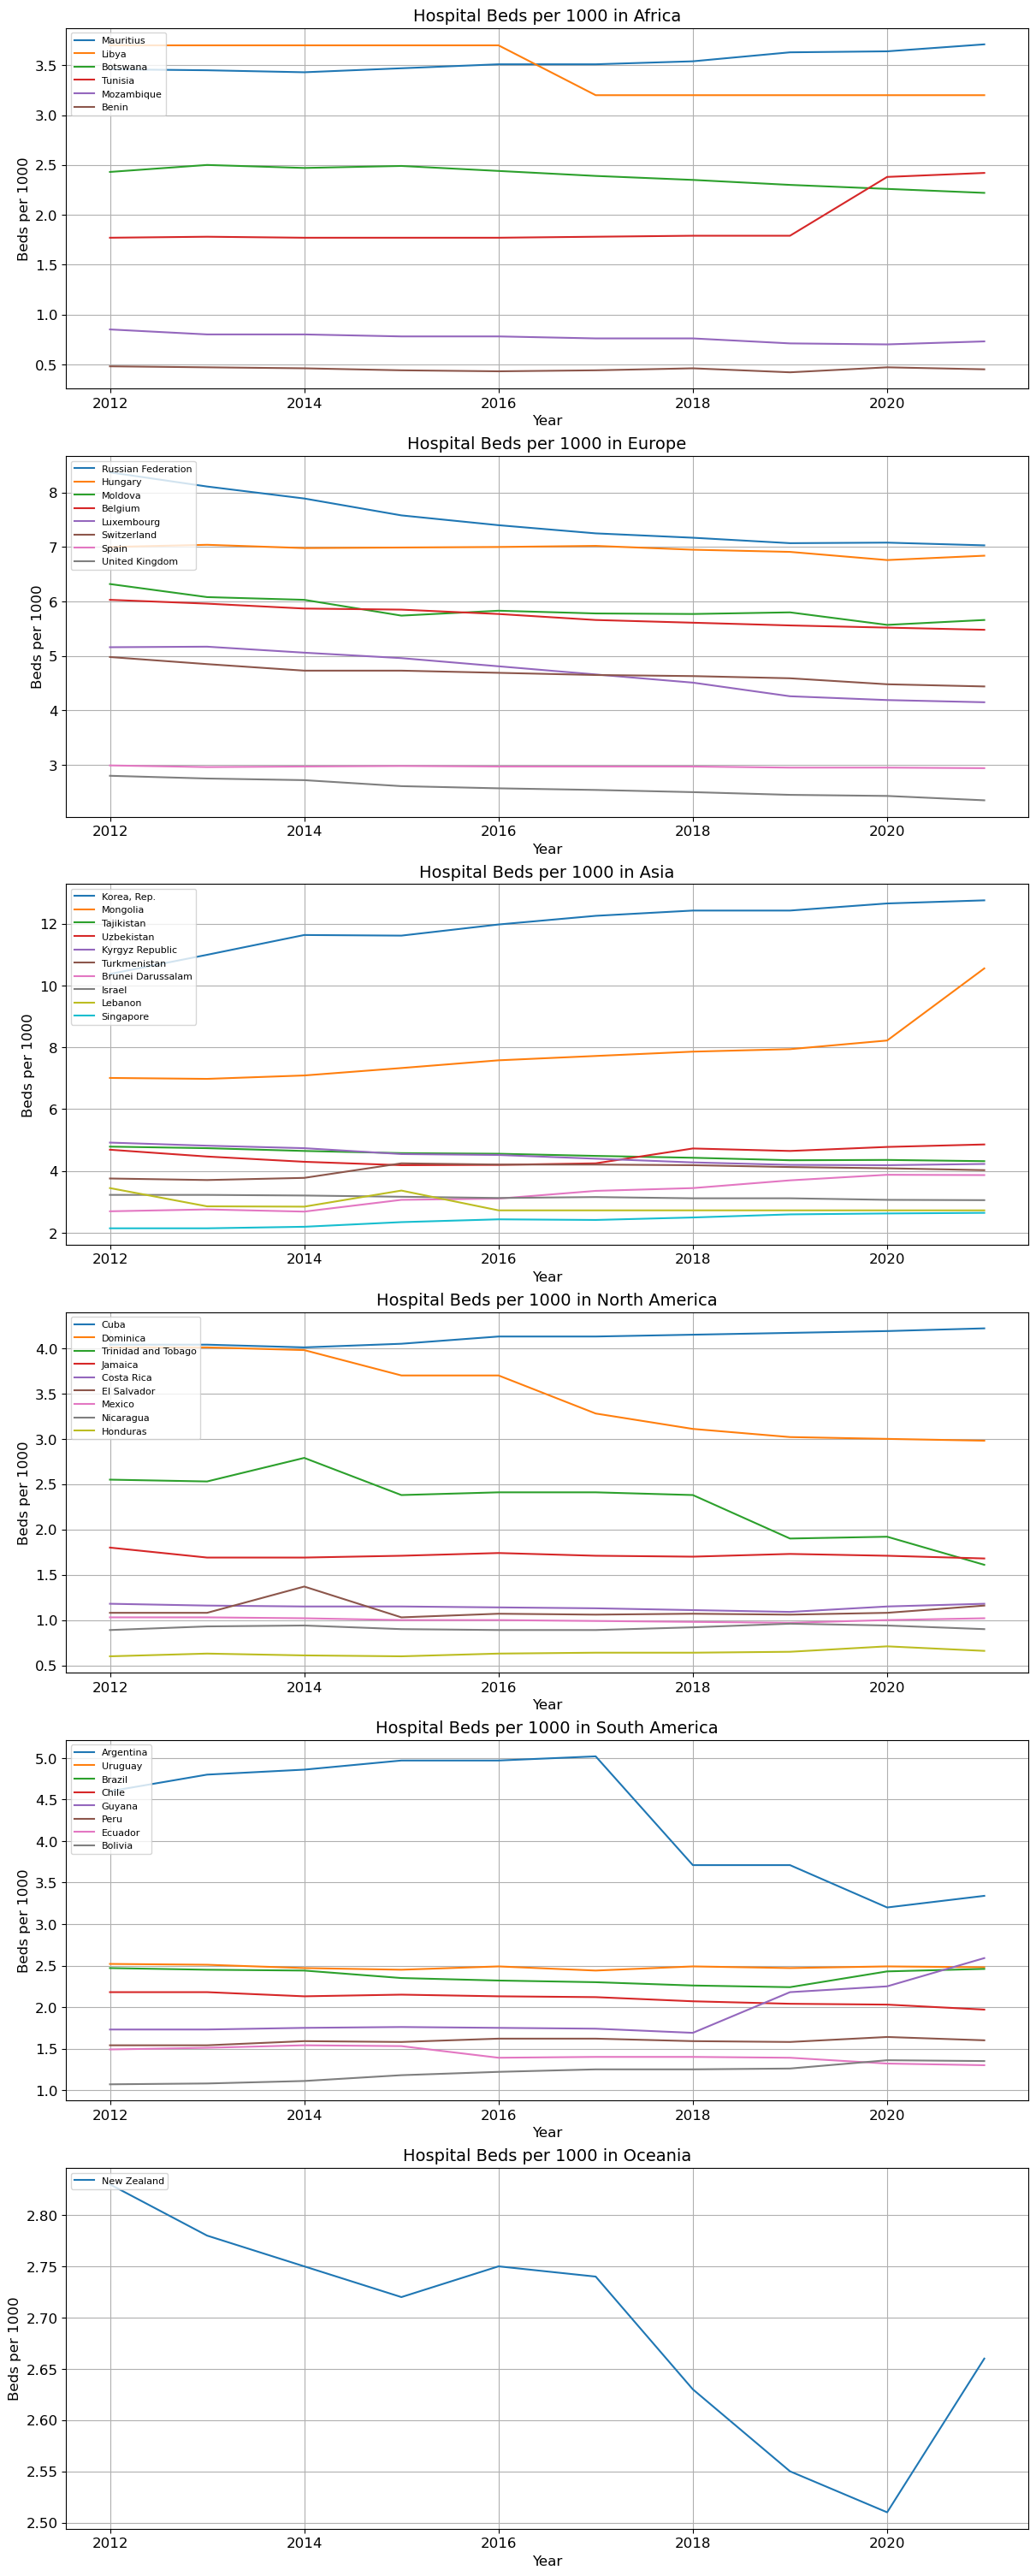

In [332]:



fig, axes = plt.subplots(6, 1, figsize=(12, 30), constrained_layout=True)
axes = axes.flatten()

for idx, (continent_code, continent_name) in enumerate(continents.items()):
    
    continent_data = data[data['Continent_Code'] == continent_code]
    
    
    countries_with_full_data = continent_data.groupby('Country').filter(
        lambda x: x['Hospital_Beds_Per_1000'].notna().sum() == 10
    )['Country'].unique()
    
    
    avg_hospital_beds = (
        continent_data[continent_data['Country'].isin(countries_with_full_data)]
        .groupby('Country')['Hospital_Beds_Per_1000']
        .mean()
        .reset_index()
    )
    
    
    top_10_countries = avg_hospital_beds.sort_values(
        by='Hospital_Beds_Per_1000', ascending=False
    ).head(10)
    
    
    top_countries_data = data[
        (data['Country'].isin(top_10_countries['Country'])) & 
        (data['Continent_Code'] == continent_code)
    ]
    
    
    ax = axes[idx]
    for country in top_10_countries['Country']:
        country_data = top_countries_data[top_countries_data['Country'] == country]
        ax.plot(
            country_data['Year'], 
            country_data['Hospital_Beds_Per_1000'], 
            label=country
        )
    
    
    ax.set_title(f'Hospital Beds per 1000 in {continent_name}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Beds per 1000', fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True)

plt.show()


<p>Zwizualizowanie top 10 państw w poziomie zaszczepienia z podziałem na kontynenty</p>

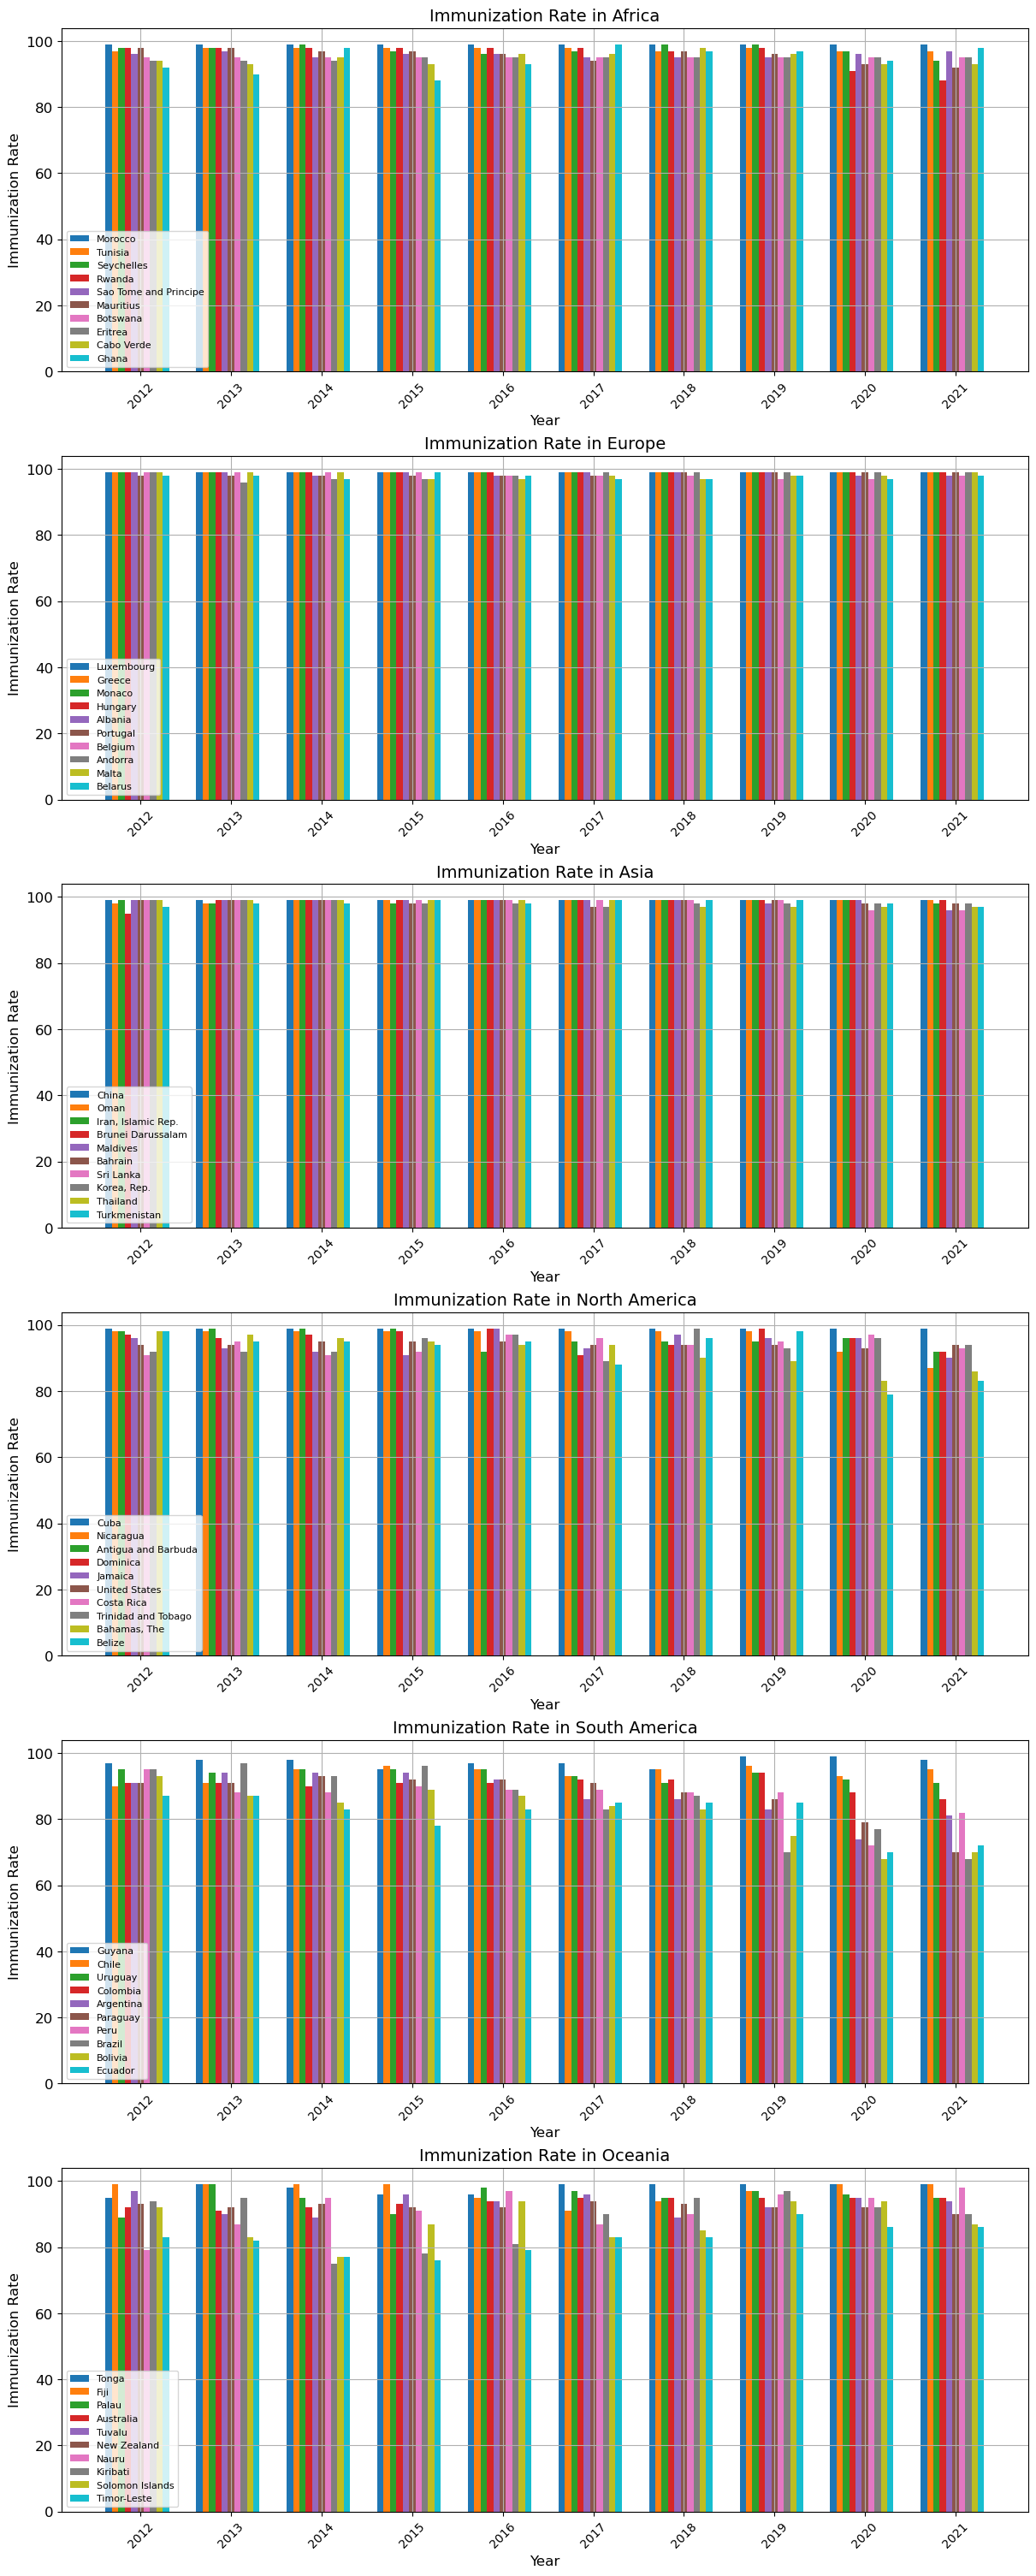

In [237]:



fig, axes = plt.subplots(6, 1, figsize=(12, 30), constrained_layout=True)
axes = axes.flatten()

for idx, (continent_code, continent_name) in enumerate(continents.items()):
    
    continent_data = data[data['Continent_Code'] == continent_code]
    
    
    avg_immunization_rate = (
        continent_data.groupby('Country')['Immunization_Rate']
        .mean()
        .reset_index()
    )
    
    
    top_10_countries = avg_immunization_rate.sort_values(
        by='Immunization_Rate', ascending=False
    ).head(10)
    
    
    top_countries_data = data[
        (data['Country'].isin(top_10_countries['Country'])) & 
        (data['Continent_Code'] == continent_code)
    ]
    
    
    ax = axes[idx]
    years = sorted(top_countries_data['Year'].unique())
    countries = top_10_countries['Country']
    bar_width = 0.07
    x_positions = range(len(years))

    for i, country in enumerate(countries):
        country_data = top_countries_data[top_countries_data['Country'] == country]
        ax.bar(
            [x + (i * bar_width) for x in x_positions], 
            country_data['Immunization_Rate'], 
            width=bar_width, 
            label=country
        )
    
    
    ax.set_title(f'Immunization Rate in {continent_name}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Immunization Rate', fontsize=12)
    ax.set_xticks([x + (len(countries) * bar_width) / 2 for x in x_positions])
    ax.set_xticklabels(years)
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(fontsize=8, loc='lower left')
    ax.grid(True)

plt.show()


<p>Zwizualizowanie 5 losowych państw w poziomie zaszczepienia z podziałem na kontynenty</p>

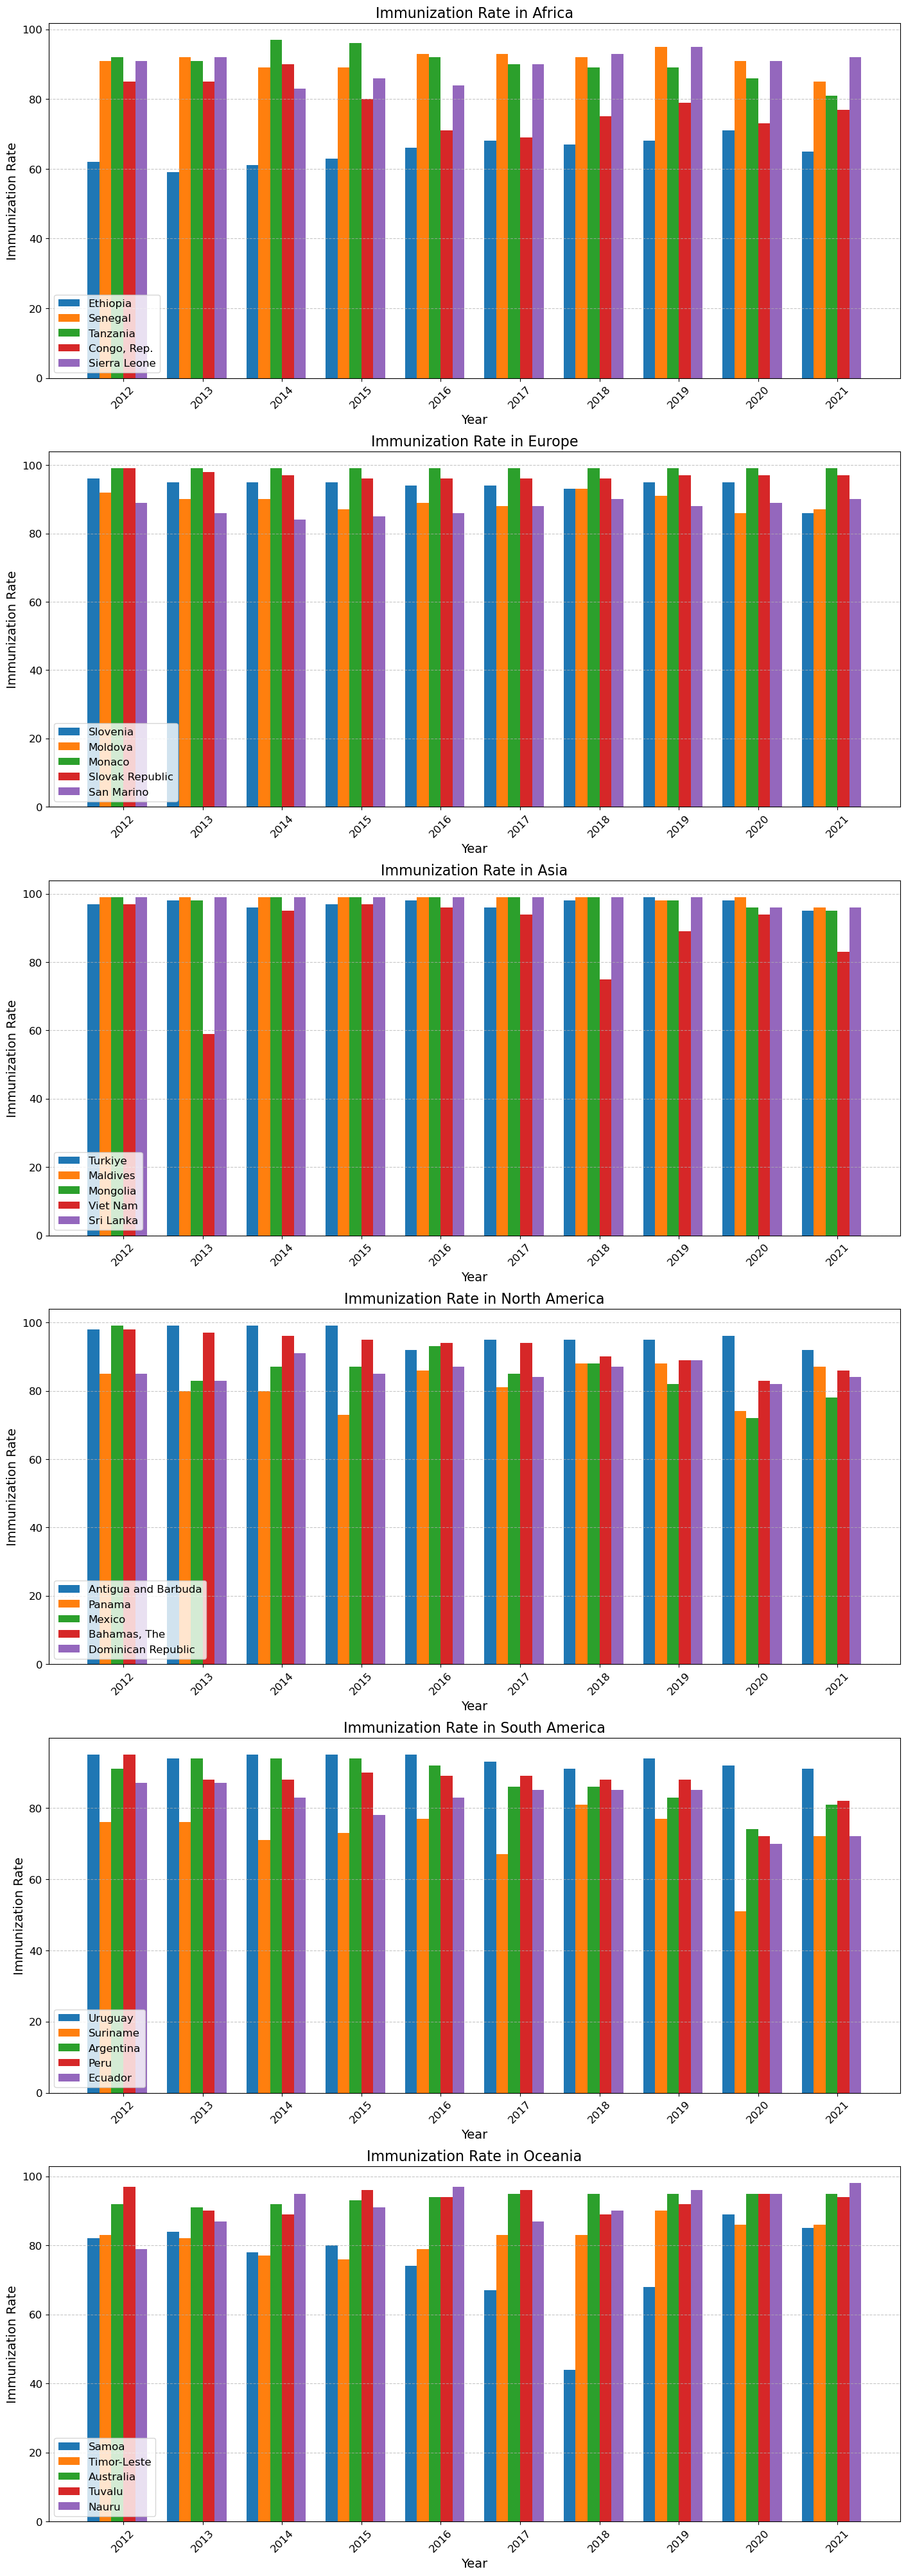

In [238]:


fig, axes = plt.subplots(6, 1, figsize=(14, 40), constrained_layout=True)
axes = axes.flatten()

for idx, (continent_code, continent_name) in enumerate(continents.items()):
    
    continent_data = data[data['Continent_Code'] == continent_code]
    
    
    selected_countries = continent_data['Country'].drop_duplicates().sample(5, random_state=42)
    
    selected_data = continent_data[continent_data['Country'].isin(selected_countries)]
    
    
    ax = axes[idx]
    years = sorted(selected_data['Year'].unique())
    bar_width = 0.15
    x_positions = range(len(years))

    for i, country in enumerate(selected_countries):
        country_data = selected_data[selected_data['Country'] == country]
        ax.bar(
            [x + (i * bar_width) for x in x_positions], 
            country_data['Immunization_Rate'], 
            width=bar_width, 
            label=country
        )
    
    ax.set_title(f'Immunization Rate in {continent_name}', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Immunization Rate', fontsize=14)
    ax.set_xticks([x + (len(selected_countries) * bar_width) / 2 for x in x_positions])
    ax.set_xticklabels(years, fontsize=12, rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(fontsize=12, loc='lower left')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<p>Pokazanie procenta bezrobocia w Europie, porówannie roku 2012 z 2021 z wyróżnieniem Polski na wykresach</p>

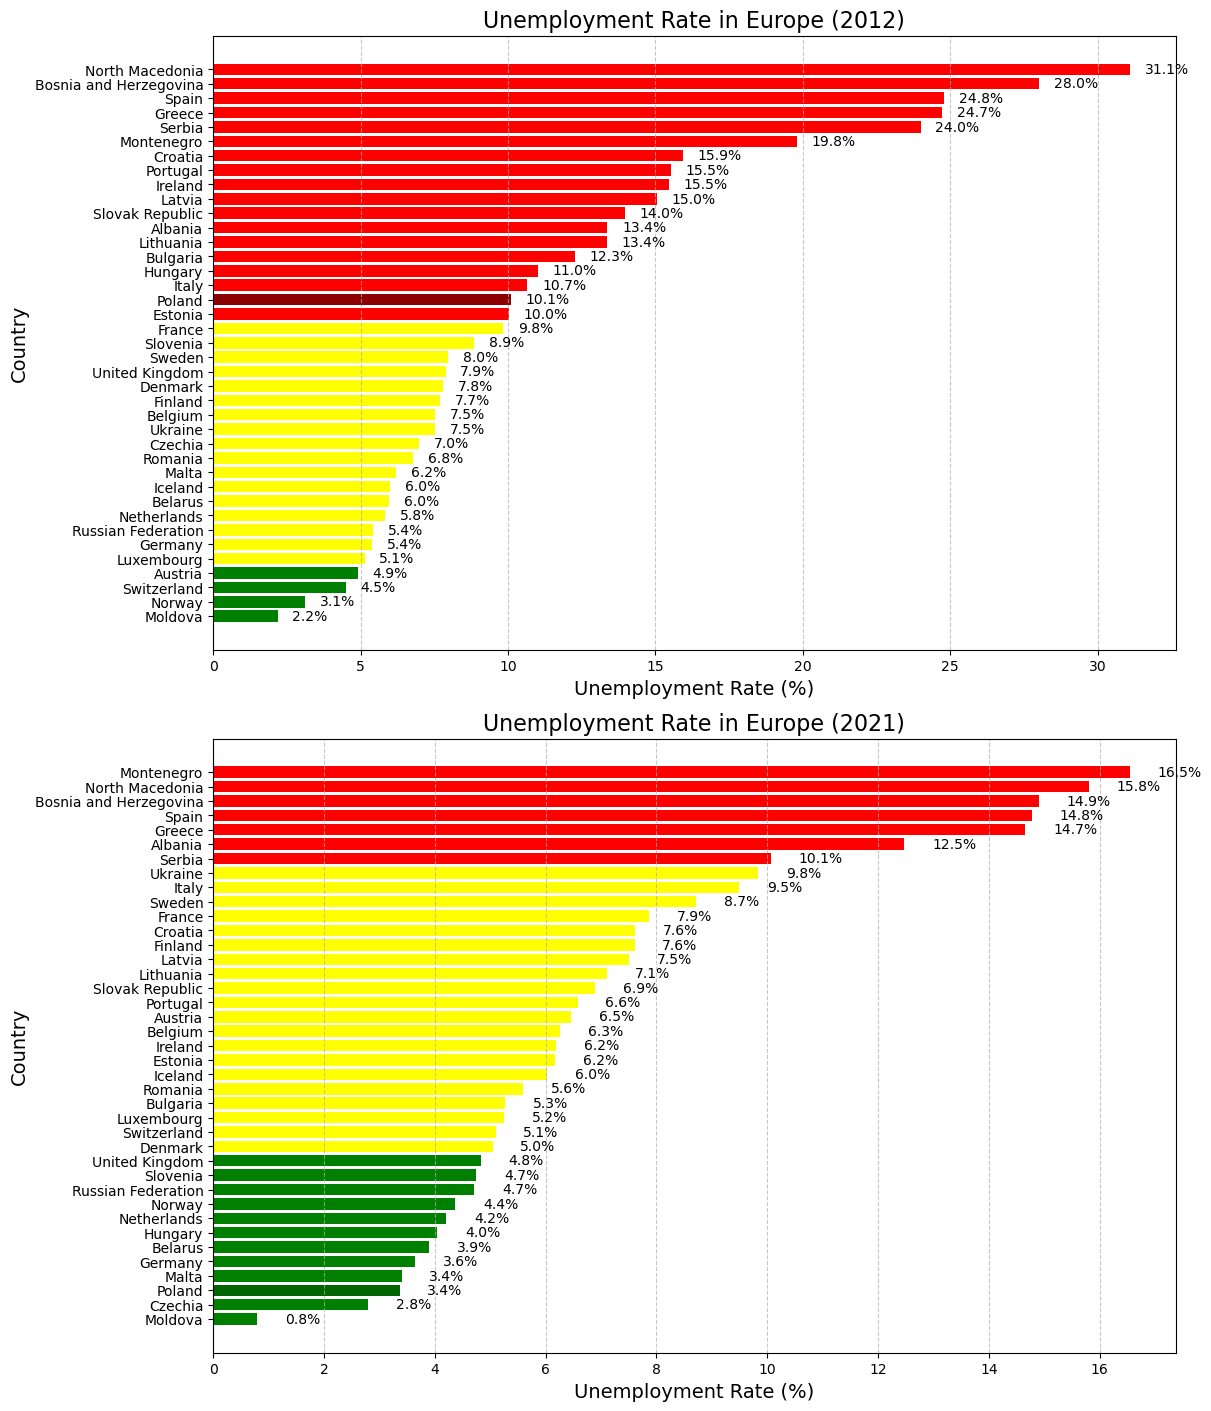

In [265]:

europe_data = data[(data['Continent_Code'] == 'EU') & (data['Year'].isin([2012, 2021]))]

fig, axes = plt.subplots(2, 1, figsize=(12, 14), constrained_layout=True)

for i, year in enumerate([2012, 2021]):
    year_data = europe_data[europe_data['Year'] == year]
    
    
    sorted_data = year_data[['Country', 'Unemployment_Rate']].dropna().sort_values(by='Unemployment_Rate', ascending=False)
    
    
    colors = []
    for _, row in sorted_data.iterrows():
        if row['Country'] == 'Poland':
            if row['Unemployment_Rate'] > 10:
                colors.append('darkred')  
            elif 5 <= row['Unemployment_Rate'] <= 10:
                colors.append('darkgoldenrod')  
            else:
                colors.append('darkgreen')  
        else:
            if row['Unemployment_Rate'] > 10:
                colors.append('red')  
            elif 5 <= row['Unemployment_Rate'] <= 10:
                colors.append('yellow')  
            else:
                colors.append('green')  
    
    
    ax = axes[i]
    bars = ax.barh(sorted_data['Country'], sorted_data['Unemployment_Rate'], color=colors)
    ax.set_title(f'Unemployment Rate in Europe ({year})', fontsize=16)
    ax.set_xlabel('Unemployment Rate (%)', fontsize=14)
    ax.set_ylabel('Country', fontsize=14)
    ax.invert_yaxis()  
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    
    for bar in bars:
        ax.text(
            bar.get_width() + 0.5,  
            bar.get_y() + bar.get_height() / 2,  
            f'{bar.get_width():.1f}%',  
            va='center', 
            fontsize=10
        )

plt.show()


<p>Pokazanie Procentu otyłości, niedowagi i nadwagi w Ameryce Północnej w 2021 roku</p>

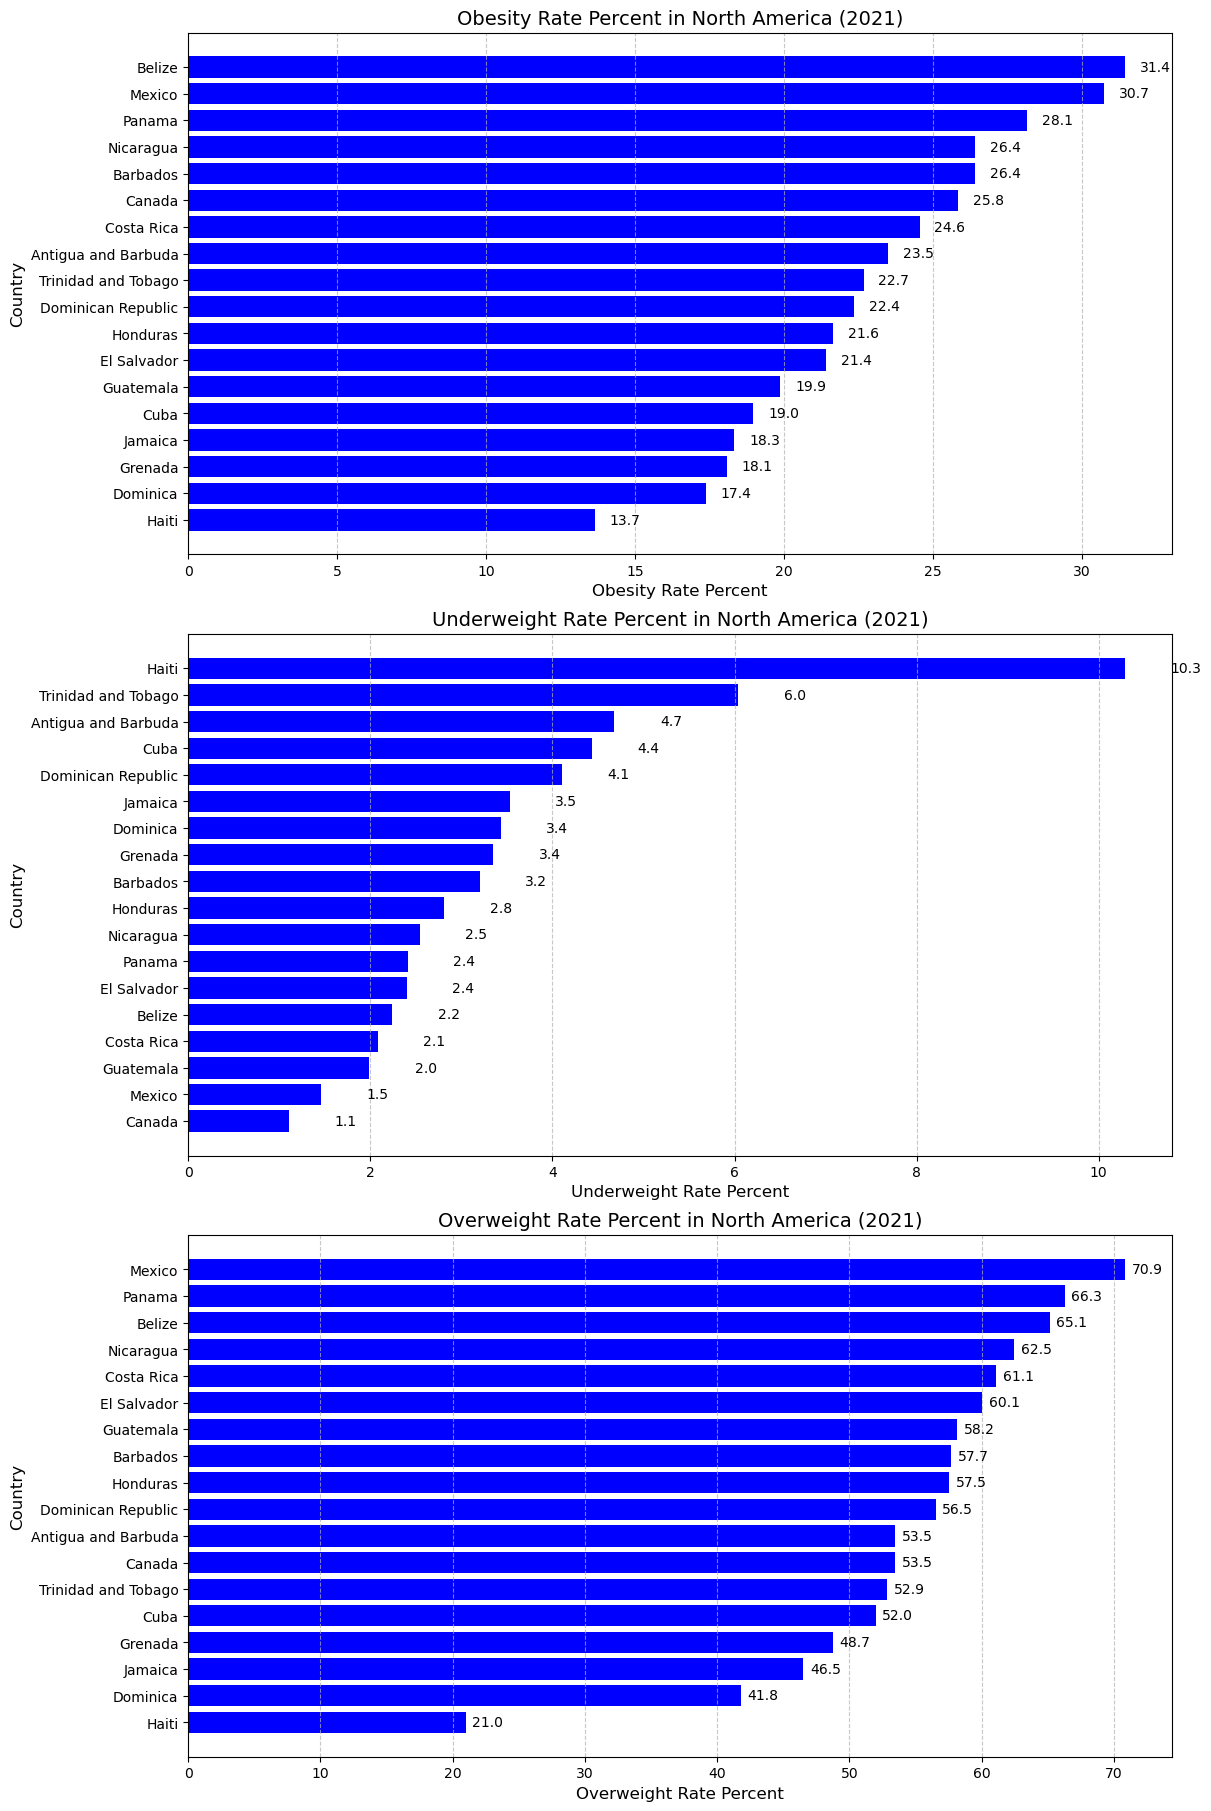

In [291]:

north_america_data = data[(data['Continent_Code'] == 'NA')]


variables = ['Obesity_Rate_Percent', 'Underweight_Rate_Percent', 'Overweight_Rate_Percent']
north_america_filtered = north_america_data.dropna(subset=variables)

latest_year = north_america_filtered['Year'].max()
latest_data = north_america_filtered[north_america_filtered['Year'] == latest_year]

fig, axes = plt.subplots(len(variables), 1, figsize=(12, 18), constrained_layout=True)
axes = axes.flatten()

for idx, variable in enumerate(variables):
    ax = axes[idx]
    sorted_data = latest_data[['Country', variable]].sort_values(by=variable, ascending=False)
    
    bars = ax.barh(sorted_data['Country'], sorted_data[variable], color='blue')
    
   
    for bar in bars:
        ax.text(
            bar.get_width() + 0.5,  
            bar.get_y() + bar.get_height() / 2,  
            f'{bar.get_width():.1f}',  
            va='center', 
            fontsize=10
        )
    
    
    ax.set_title(f'{variable.replace("_", " ")} in North America ({latest_year})', fontsize=14)
    ax.set_xlabel(variable.replace("_", " "), fontsize=12)
    ax.set_ylabel('Country', fontsize=12)
    ax.invert_yaxis()  
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



<p>Pokazanie średniej samobójstw przypadjącą na kontynet w 2012</p>

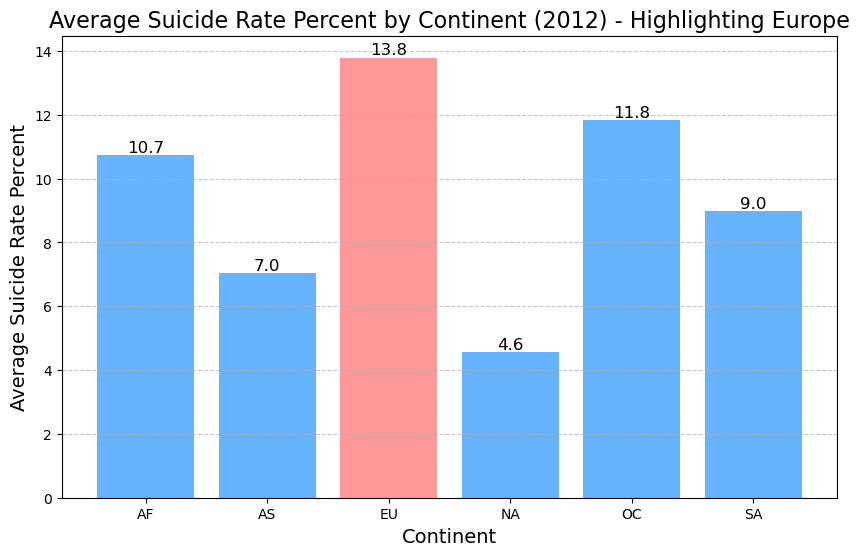

In [380]:


data_2012 = data[(data['Year'] == 2012) & (data['Suicide_Rate_Percent'].notna())]


continent_suicide_rate = data_2012.groupby('Continent_Code')['Suicide_Rate_Percent'].mean().reset_index()


labels = continent_suicide_rate['Continent_Code']
sizes = continent_suicide_rate['Suicide_Rate_Percent']


plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=['#ff9999' if label == 'EU' else '#66b3ff' for label in labels])
plt.title('Average Suicide Rate Percent by Continent (2012)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Average Suicide Rate Percent', fontsize=14)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
             f'{bar.get_height():.1f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<p>Pokazanie globalnego % wszystkich samobójstw na kontynet w 2012</p>

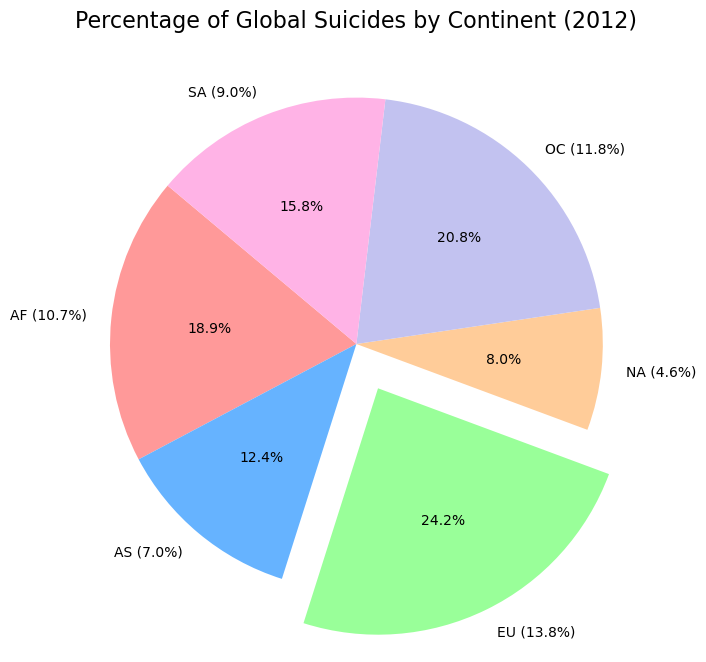

In [399]:


data_2012 = data[(data['Year'] == 2012) & (data['Suicide_Rate_Percent'].notna())]


continent_suicide_rate = data_2012.groupby('Continent_Code')['Suicide_Rate_Percent'].mean().reset_index()


labels = [
    f"{label} ({value:.1f}%)"
    for label, value in zip(continent_suicide_rate['Continent_Code'], continent_suicide_rate['Suicide_Rate_Percent'])
]
sizes = continent_suicide_rate['Suicide_Rate_Percent']
explode = [0.2 if label.startswith('EU') else 0 for label in labels]  


plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Percentage of Global Suicides by Continent (2012)', fontsize=16)
plt.show()


<p>Pokazanie top 10 państw z największym % samobójstwa</p>

In [378]:

europe_data_2012 = data[
    (data['Continent_Code'] == 'EU') & 
    (data['Year'] == 2012) & 
    (data['Suicide_Rate_Percent'].notna())
]


top_10_suicide_rate = europe_data_2012.nlargest(10, 'Suicide_Rate_Percent')[['Country', 'Suicide_Rate_Percent']]

top_10_suicide_rate

Country  Suicide_Rate_Percent
930     Latvia                 23.53
1760   Ukraine                 23.11
1530  Slovenia                 21.95
550    Estonia                 21.09
1370    Poland                 18.51
420    Croatia                 18.39
1480    Serbia                 18.22
600     France                 17.78
590    Finland                 16.95
450    Czechia                 16.70


<p>Pokazanie średniej samobójstw przypadjącą na kontynet w 2019</p>

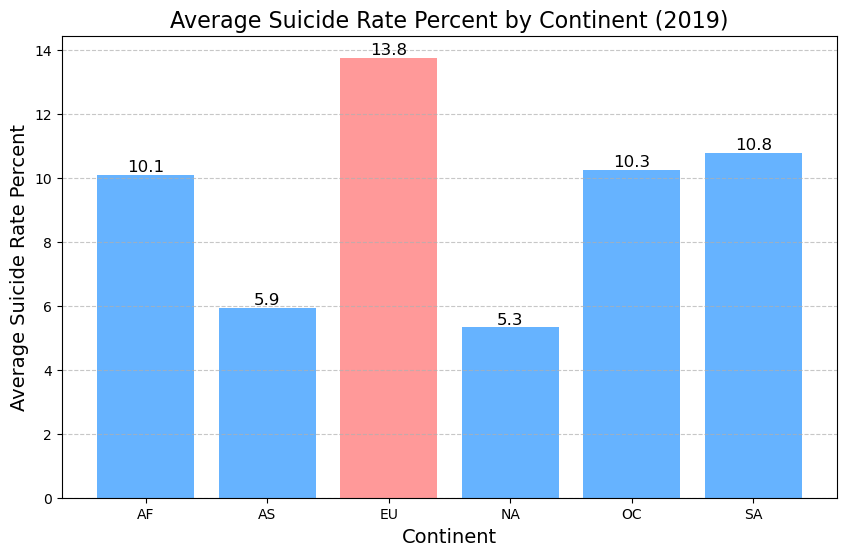

In [382]:


data_2019 = data[(data['Year'] == 2019) & (data['Suicide_Rate_Percent'].notna())]


continent_suicide_rate = data_2019.groupby('Continent_Code')['Suicide_Rate_Percent'].mean().reset_index()


labels = continent_suicide_rate['Continent_Code']
sizes = continent_suicide_rate['Suicide_Rate_Percent']


plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=['#ff9999' if label == 'EU' else '#66b3ff' for label in labels])
plt.title('Average Suicide Rate Percent by Continent (2019)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Average Suicide Rate Percent', fontsize=14)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
             f'{bar.get_height():.1f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<p>Pokazanie globalnego % wszystkich samobójstw na kontynet w 2019</p>

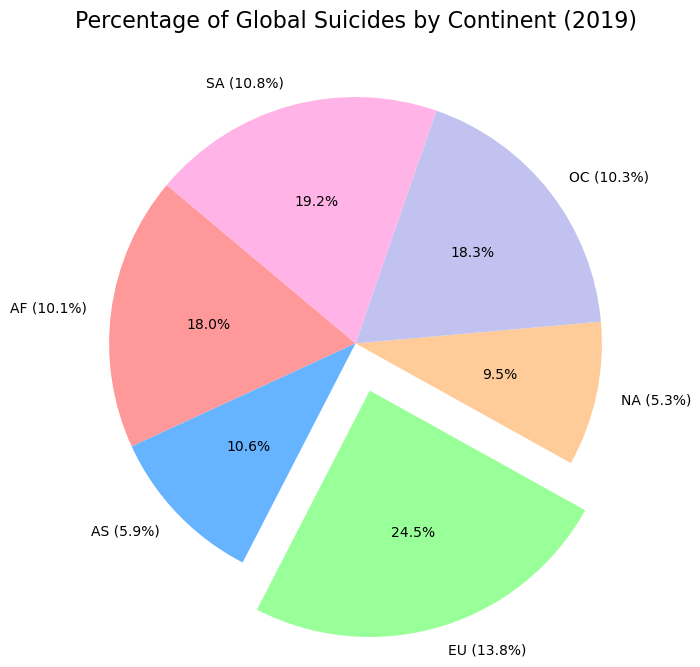

In [410]:


data_2019 = data[(data['Year'] == 2019) & (data['Suicide_Rate_Percent'].notna())]


continent_suicide_rate = data_2019.groupby('Continent_Code')['Suicide_Rate_Percent'].mean().reset_index()


labels = [
    f"{label} ({value:.1f}%)"
    for label, value in zip(continent_suicide_rate['Continent_Code'], continent_suicide_rate['Suicide_Rate_Percent'])
]
sizes = continent_suicide_rate['Suicide_Rate_Percent']
explode = [0.2 if label.startswith('EU') else 0 for label in labels]  


plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Percentage of Global Suicides by Continent (2019)', fontsize=16)
plt.show()


<p>Pokazanie top 10 państw z największym % samobójstwa</p>

In [374]:
europe_data_2019 = data[
    (data['Continent_Code'] == 'EU') & 
    (data['Year'] == 2019) & 
    (data['Suicide_Rate_Percent'].notna())
]


top_10_suicide_rate = europe_data_2019.nlargest(10, 'Suicide_Rate_Percent')[['Country', 'Suicide_Rate_Percent']]

top_10_suicide_rate

Country  Suicide_Rate_Percent
997            Lithuania                 26.14
1417  Russian Federation                 25.11
1767             Ukraine                 21.63
157              Belarus                 21.20
937               Latvia                 20.12
1537            Slovenia                 19.78
747              Hungary                 16.65
1407             Romania                 16.52
427              Croatia                 16.37
807              Ireland                 15.44